# **Supervised - Student Scores - Regression**

In [ ]:
# import all the libraries
import pandas as pd #read data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #ubah jadi array

### Import dataset

In [ ]:
# read the dataset using pandas
data=pd.read_csv('student_scores.csv')
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Provides some information regarding the columns in the data
data.info()
# Jika numerik bisa pake median, nilai median yang akan menggantikan nilai yang kosong di Non-Null Count
# Jika kategorikal / object / datetime bisa pake modus buat menggantikan nilai yang hilang
# non = tidak, null = kosong
# Jika jenis data adalah kategorikal (dtype=object) atau data waktu (dtype=datetime), maka modus dapat digunakan untuk menggantikan nilai yang hilang (null)."

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.isna().sum() # .isna() = ada missing value atau ga? Kemudian .sum() untuk dijumlahkan, jika jawaban 0, maka aman.

Hours     0
Scores    0
dtype: int64

In [ ]:
data.value_counts() # data bisa lebih dari 1=(bagian paling kanan)

Hours  Scores
1.1    17        1
5.1    47        1
8.9    95        1
8.5    75        1
8.3    81        1
7.8    86        1
7.7    85        1
7.4    69        1
6.9    76        1
6.1    67        1
5.9    62        1
5.5    60        1
4.8    54        1
1.5    20        1
4.5    41        1
3.8    35        1
3.5    30        1
3.3    42        1
3.2    27        1
2.7    30        1
       25        1
2.5    30        1
       21        1
1.9    24        1
9.2    88        1
Name: count, dtype: int64

In [ ]:
# this describes the basic stat behind the dataset used
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 900x500 with 0 Axes>

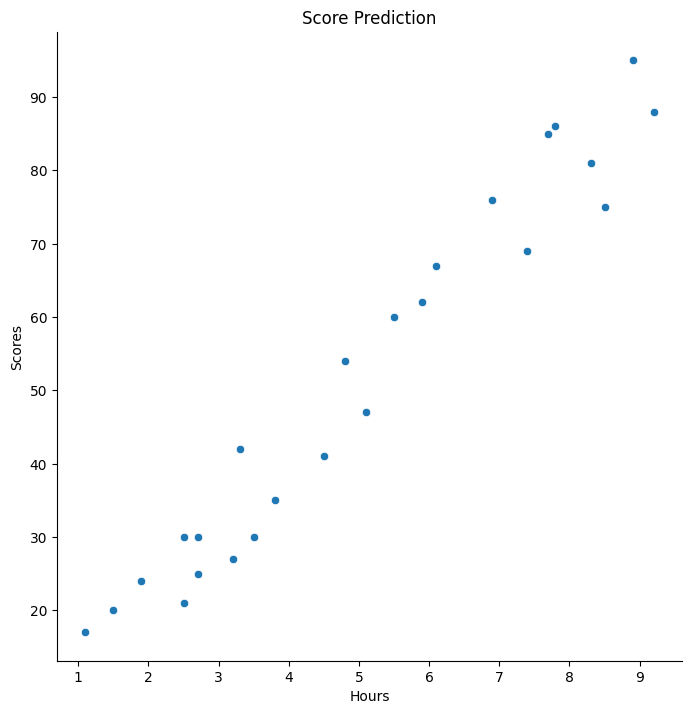

In [ ]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(9,5))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Score Prediction')
plt.show()

### Feature Engineering
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

### Investigate of Feature Engineering

In [ ]:
df = data.copy()
print("Data Sebelum Pemeriksaan Duplikat:", df.shape)
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before
df = df.drop_duplicates()
print("Data Setelah Pemeriksaan Duplikat:", df.shape)

Data Sebelum Pemeriksaan Duplikat: (25, 2)
Data Setelah Pemeriksaan Duplikat: (25, 2)


In [ ]:
#Check missing value
df.isna().sum()

Hours     0
Scores    0
dtype: int64

###Outlier Analysis

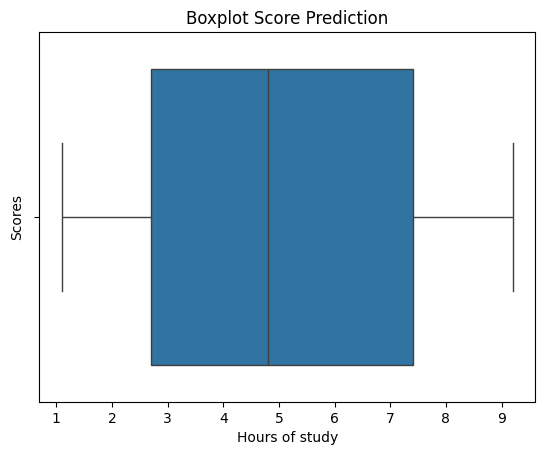

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.title("Boxplot Score Prediction")

# Menampilkan plot
plt.show()

### There's no outlier value
### There are no problems in investigate Feature Engineering, next we are doing machine learning modelling and splitting data into X_train, X_test -> Predictor, y_train, y_test -> target variables. If there are problems in investigate feature engineering then doing splitting data and process feature engineering handling.

###Splitting the Data

In [ ]:
#split data
X= data['Hours']
#x=data[data(kolom1,k2,..,kn)]
X.head()


0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [ ]:
#scores
Y=data['Scores']
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [ ]:
#import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
#split data train dan test
#data train harus > data test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=42)

In [ ]:
!pip install scikit-learn

###Linear Regression

In [ ]:
#import linier regration dari scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
#ubah ke array
X_train=np.array(X_train)[:,np.newaxis]
X_test=np.array(X_test)[:,np.newaxis]

In [ ]:
#Array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
#Array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
Y_train

1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [ ]:
Y_test

8     81
16    30
0     21
23    76
11    62
9     25
13    42
Name: Scores, dtype: int64

In [ ]:
#mesin mempelajari data train
# Reshape X_train dari (18, 1, 1) menjadi (18, 1)
X_train_reshaped = X_train.reshape(18, 1)
#harus 2 dimensi
X_train_reshaped

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
# Memastikan Y_train dalam bentuk yang sesuai
Y_train_reshaped = Y_train
Y_train_reshaped

1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [ ]:
# Latih model regresi linear dengan data yang sudah direshape
lr_model = LinearRegression()
lr_model.fit(X_train_reshaped, Y_train_reshaped)

LinearRegression()

In [ ]:
# Misalkan X_test memiliki dimensi (7, 1, 1)
#harus dalam 2 dimensi
X_test_reshaped = X_test.reshape(7, 1)
X_test_reshaped

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
#evaluasi model ke x test
y_pred=lr_model.predict(X_test_reshaped)
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

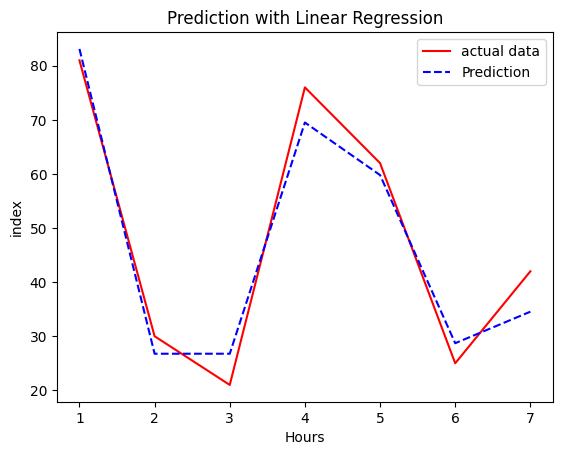

In [ ]:
#plot untuk mengetahui apakah prediksi sudah tepat.
#Ytest dibandingkan sama Ypred
c=[i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='r',linestyle='-',label='actual data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

#### R Squared Linear Regresssion

In [ ]:
#import metriks dari scikit learn
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
rsq=r2_score(Y_test,y_pred)

In [ ]:
print('r Squared linear regression', rsq)

r Squared linear regression 0.9553509219739938


In [ ]:
#intercept and koefisien
print('intercept of Linear regression model:',lr_model.intercept_)
print('koefisien of the line Linear regression :',lr_model.coef_)
#y=mx+c
#m=gradien
#x=hours
#c intercept



intercept of Linear regression model: 2.4803670915057623
koefisien of the line Linear regression : [9.71409219]


###Kesimpulan
Y= 9.71409219 X + 2.4803670915057623

###Decision Tree


In [ ]:
#bandingkan dengan decision tree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model= DecisionTreeRegressor()
dt_model.fit(X_train_reshaped,Y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt=dt_model.predict(X_test_reshaped)

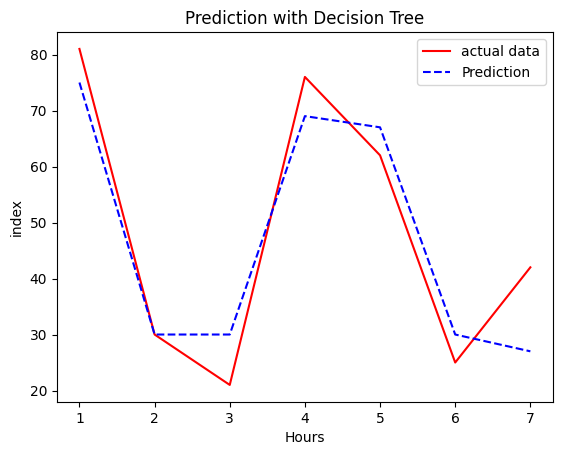

In [ ]:
#plot untuk mengetahui apakah prediksi sudah tepat.
#Ytest dibandingkan sama Ypred
c=[i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='r',linestyle='-',label='actual data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
rsq_dt=r2_score(Y_test,y_pred_dt)

In [ ]:
print('r square Desicion tree result:',rsq_dt)

r square Desicion tree result: 0.8803859268443893


##KESIMPULAN:
Dari hasil pemodelan di atas, dapat disimpulkan bahwa Model Linear Regression lebih direkomendasikan untuk dipakai dibandingkan Model Decision Tree, karena nilai R squared lebih tinggi Model Linear Regression dibanding Model Decision Tree.   

*   R score Linear Regresion = 95
*   R score Decision Tree = 88
